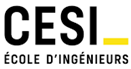
# <center><b><u>Livrable final :</u></b> </center>

### <u><b>Groupe :</b></u>
- BARRY Mamadou
- SADOWSKI Yann
- RAMBAUT Anthony
- VICINI Alexandre
- ALLIAS Gautier

FISA A3 INFO Pau


### <u><b>Sommaire :</b></u>
- [Contexte](#contexte) :
- Partie 1 : [Modélisation](#modelisation)
- Partie 2 : [Implémentation et exploitation](#implexpl)
- [Annexes](#annexes) : 
    - [Démonstation de la NP-complétude du TSP](#npcomplet)

### <u><b>Contexte :</b></u><a name="contexte"></a>
L’ADEME (Agence de l’Environnement et de la Maîtrise de l’Energie) a récemment lancé un appel à manifestation d’intérêt pour promouvoir la réalisation de démonstrateurs et d’expérimentations de nouvelles solutions de mobilité pour les personnes et les marchandises adaptées à différents types de territoires.

Notre structure CesiCDP est déjà bien implantée dans le domaine. Aidé de nombreux partenaires, nous avons réalisé plusieurs études sur le thème de la Mobilité Multimodale Intelligente. Les nouvelles technologies de transport, plus économiques et moins polluantes ne sont pas sans poser de nouveaux défis notamment d’un point de vue de l’optimisation de la gestion des ressources. Mais ces problèmes de logistique du transport présentent un enjeu majeur pour l’avenir : ses applications sont nombreuses (distribution du courrier, livraison de produits, traitement du réseau routier, ramassage des ordures) et leur impact sur l’environnement peut être véritablement significatif.

Nous sommes une équipe de 5 personnes mise en place par CesiCDP pour répondre à l’appel de l’ADEME. L’enjeu est d’obtenir de nouveaux marchés avec des financements très intéressants pour continuer à développer votre activité.

CesiCDP a décidé d’orienter son étude sur la gestion de tournées de livraison. Le problème algorithmique consiste à calculer sur un réseau routier une tournée permettant de relier entre elles un sous-ensemble de villes, puis de revenir à son point de départ, de manière à minimiser la durée totale de la tournée. Cette optimisation devra tenir compte du trafic prévu sur chaque axe pour les différentes tranches horaires.

L’idée est de proposer une méthode issue de la Recherche Opérationnelle pour générer une tournée de livraison correspondant à ce problème.

Le périmètre reste encore à préciser. Nous avons décrit une version de base du problème. Mais, afin de le rendre plus réaliste et retenir toute l’attention de l’ADEME, nous hésitons à ajouter des contraintes supplémentaires. Il faut s’attendre à ce qu’il soit ainsi plus dur à traiter.
<br><br>

### <u><b>1. Modélisation :</b></u><a name="modelisation"></a>
- #### <u>Notre problème :</u><br>
    Déterminer les tournées d'une flotte de véhicules afin de livrer une liste de villes, c'est le problème de tournées de véhicules (mTSP)
    
    Notre graphe va être constitué comme ceci :
    - noeuds -> Nos villes
    - arêtes pondérées -> Les routes entre nos villes avec le temps de trajet
    
    <br>
    
    <b><u>On peut poser le problème de décision suivant :</u></b> <br>
    <u>Données :</u> 
    - Un graphe $G=(V,E)$, avec $V$ notre ensemble de villes et $E$ l'ensemble de nos arêtes-valué
    - Un sous-ensemble $S$ correspondant aux villes où il y aura une livraison
    - Un entier $k$ correspondant au nombre de camions
    - Un entier $t$ correspondant au temps visé 
    <br><br>

    <u>Question :</u> <br>Existe-t-il un circuit passant par chaque ville $i$ d'un sous-ensemble de villes $S$ où le dernier de nos $k$ camions fini sa tournée dans un temps qui est au plus à $t$ ?
    <br><br>

    <b><u>On peut en poser le problème d'optimisation suivant :</u></b> <br>
    <u>Données :</u> 
    - Un graphe $G=(V,E)$, avec $V$ notre ensemble de villes et $E$ l'ensemble de nos arêtes-valué
    - Un sous-ensemble $S$ correspondant aux villes où il y aura une livraison
    - Un entier $k$ correspondant au nombre de camions
    - Un entier $t$ correspondant au temps visé 
    <br><br>

    <u>Question :</u> Pour quel $t$ le plus petit, la réponse au problème décision est oui ? 
    <br><br>
    
    
- #### <u>Démonstration de NP-complétude du mTSP :</u><br>
    Pour que le mTSP soit dans NP-complet il faut prouver qu'il est dans NP et qu'il est NP-Difficile.

    <b>NP :</b> <br>
    Le mTSP est dans la classe de complexité NP car, étant donné une suite de sommets, on peut vérifier en un temps linéaire :
    - si cette suite de sommets constitue bien un circuit : il faut vérifier qu’elle parcourt bien les sommets de proche en proche (chaque sommet est le voisin du précédent). Cette vérification se fait en temps linéaire $O(n)$.
    - si les $k$ camions combinés passe au moins une fois par chaque sommet. Cette vérification se fait en temps linéaire $O(n^2)$.
    - si son coût (le temps de trajet) est inférieur à $t$ : il faut faire la somme des valeurs des arêtes parcourues par le circuit, et vérifier si cette somme est inférieure à $t$. Cette vérification se fait en temps linéaire $O(n)$.<br><br>
    
    <b>NP-difficile :</b> <br>
    Ici il n'y a pas besoin de réduire polynomialement mTSP au TSP étant donné que l'on sait que le TSP est une instance du mTSP où le nombre de camion $k$, or on sait que le TSP est NP-Complet (voir [Annexe](#npcomplet))

    Puisque le TSP (Travel Salesman Problem) est dans la classe NP et qu'il est NP-dfficile on sait qu'il est NP-complet puisque c'est l'intersection des deux
<br><br>


- #### <u>Mise en forme du problème sous forme de programmation linéaire :</u><br>
    - <u>Données du problème :</u><br>
        - Un graphe $G=(V,E)$, avec $V$ notre ensemble de $n$ villes et $E$ l'ensemble de nos arêtes-valué
        - Un sous-ensemble $S$ correspondant aux villes où il y aura une livraison
        - Un entier $k$ correspondant au nombre de camions
        - Un entier $t$ correspondant au temps visé 
        - Une matrice de distances $d$, où $d[i,j]$ représente la distance entre la ville $i$ et la ville $j$
        <br><br>
    - <u>Objectif :</u><br>
        Minimiser la distance totale parcourue par le voyageur de commerce lors de son cycle.
    <br><br>
    - <u>Variables de décision :</u><br>
    $x_{ijk}$ : Une variable binaire correspondant à chaque paire de vile $i$ et $j$ où le camion numéro $k$ est passé où : 
        - $x_{ijk} = 1 ->$ si le voyageur se déplace directement de la ville $i$ à la ville $j$
        - $x_{ijk} = 0 ->$ si non
    <br><br>
    - <u>Contraintes :</u><br>
        1. Chaque ville doit être visitée exactement une fois : 
            - $\sum_{j=1}^{n} \sum_{k=1}^{n} x_{ijk} = 1$ pour tout $i$ dans $V$
            - $\sum_{i=1}^{n} \sum_{k=1}^{n} x_{ijk} = 1$ pour tout $j$ dans $V$
            <br><br>
        2. Le dépot, le noeud de départ du cycle noté $O$ :
            - $\sum_{j=1}^{n} \sum_{k=1}^{n} x_{0jk} = k$
            - $\sum_{i=1}^{n} \sum_{k=1}^{n} x_{i0k} = k$
            <br><br>
        3. Il faut que la taille du cycle soit égale à : 
            - $\sum_{i=1}^{n} \sum_{j=1}^{n} \sum_{k=1}^{n} x_{ijk} = n - k$ où $n$ est le nombre de villes
            <br><br>
        4. $x_{ijk}$ est un entier compris entre 0 et 1 :
            - $x_{ijk} \in{0,1}$
    <br><br>
    - <u>Fonction objectif :</u><br>
        $MIN:\sum_{i=1}^{n} \sum_{j=1}^{n} \sum_{k=1}^{n} d[i,j] \cdot x_{ijk}$
    <br><br>
    - <u>Forme complète :</u><br>
        $\begin{array}{rl@{}ll}
        \text{Minimiser}  & \sum_{i=1}^{n} \sum_{j=1}^{n} \sum_{k=1}^{n} d[i,j] \cdot x_{ijk} &\\
        \text{sc.}& \sum_{j=1}^{n} \sum_{k=1}^{n} x_{ijk} = 1 \text{ pour tout } i \text{ dans } V\\
                  & \sum_{i=1}^{n} \sum_{k=1}^{n} x_{ijk} = 1 \text{ pour tout } j \text{ dans } V\\
                  & \sum_{j=1}^{n} \sum_{k=1}^{n} x_{0jk} = k\\
                  & \sum_{i=1}^{n} \sum_{k=1}^{n} x_{i0k} = k\\
                  & \sum_{i=1}^{n} \sum_{j=1}^{n} \sum_{k=1}^{n} x_{ijk} = n - k \text{ où }n \text{ est le nombre de villes}\\
                  & x_{ijk} \in{0,1} \text{ pour tout } i \text{ et } j \text{ dans }V
        \end{array}$
    <br><br>

- #### <u>Documentation :</u>
    Voici quelques exemple d'articles que nous avons parcourus lors de nos recherches :
    - Collaboration de solveurs du problème de tournées de véhicules, Louis Baudoux
        <br>lien : https://dial.uclouvain.be/memoire/ucl/en/object/thesis%3A17209/datastream/PDF_01/view
    - Optimisation de distribution de biens et services, Btisam Mourid St-Pierre
        <br>lien : https://doc.rero.ch/record/32038/files/MASBA_6.pdf
    - Optimisation de la planification des tournées de véhicules électriques, Tayeb Oulad Kouider
        <br>lien : https://hal.univ-lorraine.fr/tel-03132558/file/DDOC_T_2020_0154_OULAD_KOUIDER.pdf
    - An effective method for solving multiple travelling salesman problem based on NSGA-II, Yang Shuai
        <br>lien : https://www.tandfonline.com/doi/full/10.1080/21642583.2019.1674220?scroll=top&needAccess=true
    - An Effective Iterated Two-stage Heuristic Algorithm for the Multiple Traveling Salesmen Problem
        <br>lien : https://arxiv.org/pdf/2201.09424.pdf
<br><br>

- #### <u>Résumé, méthode(s) de résolution :</u><br>
    Dans notre cas nous avons ceci : un Problème NP-complet, linéaire en nombre entier. Une solution est constituée comme ceci : <br>
    <center>$[[A, B, C, D, A], [A, E, F, A], [A, G, H, I, A]]$ pour 3 camions, 8 villes et un dépot ($A$ dans notre cas)</center>
    
    <br>Pour ce qu'il est des méthodes de résolution envisagées les voici : 
    - mTSP Genetic Algorithm : un algorithme génétique pour le mTSP 
    - Random Cluster mTSP Genetic Algorithm : un algorithme qui va diviser la zone géographique en paquet et ensuite appliquer un algorithme génétique pour améliorer la solution à notre problème du mTSP
    - K-means Cluster mTSP Genetic Algorithm : un algorithme k-means qui va diviser la zone géographique en cluster et ensuite appliquer un algorithme génétique pour améliorer la solution
    - Clustered Greedy Algorithm : un algorithme glouton par paquet qui va diviser notre zonne géographique en N parties et appliquer une résolution d'un TSP à chacune de ces zones
    - Greddy Algorithm : un algorithme glouton plus classique
    
    <br>Pour ce qu'il est du fonctionnement de chacune de ses méthodes de résolution nous pourrons en voir plus dans la [partie 2](#implexpl)
    
<br><br>

### <u><b>2. Implémentation et exploitation :</b></u><a name="implexpl"></a>
Cette partie va être divisée en 5 "petits" notebook par soucis de lisibilité, chacun de ces notebooks va avoir la même structure : 
- Données nécéssaires au fonctionnement de l'algorithme
- Présentation du fonctionnement de l'algorithme
- Plan d'expérience
- Implémentation de l'algorithme
- Exécution de l'algorithme avec une instance aléatoire 
- Exécution de l'algorithme avec des instances prédéfinies et analyse des performances : 
    - rat99 avec 2, 3, 5 et 7 camions
    - grandes instances, 2000, 4000, 6000 et 8000 villes
- Bilan et critique concernant chacune de ces méthodes

<br>

##### <u><b>Les différentes méthodes de résolution :</b></u>
Dans notre projet de recherche d'itinéraire pour une tournée de livraison avec une flotte de camions, nous cherchons à optimiser la distance parcourue par le dernier camion rentrant à l'entrepôt. Afin d'y parvenir nous avons identifié 2 méthodes de résolution différentes à savoir :

- Une méthode de résolution directe du mTSP (sans contrainte de demande).

- Une méthode de résolution en 2 parties, tout d'abord, on divise l'ensemble de villes en sous-ensemble de ville (cluster) puis on effectue une résolution du TSP sur chaque sous-ensemble de ville. 

Pour chacune de ces deux méthodes nous avons 2 algorithmes :

Méthodes directes :
- mTSP genetic algorithm
- Greedy Algorithm

Méthodes en 2 parties :
- Random clustering with Genetic Algorithm
- K-means clustering with Genetic Algorithm
- Clustered Greedy Algorithm

(Voir chacun des notebooks associés)

<br>

##### <u><b>Synthèse et statistiques à propos des 5 méthodes :</b></u>
- <b>Tableaux comparatifs des performances :</b>
    - Evolution du nombre de camions sur l'instance du rat99 : <br>
    
        | Trucks number |---| Rat99 |     |     |---| mTSP Genetic Algorithm |     |     |           |---|Random Cluster mTSP Genetic Algorithm |     |     |            |---|K-means Cluster mTSP Genetic Algorithm |     |     |            |---|Clustered Greedy Algorithm |     |      |         |---|Greddy Algorithm |     |      |          |---|
        |---------------|---|-------|-----|-----|---|-----------------------|-----|-----|-----------|---|--------------------------------------|-----|-----|------------|---|----------------------------------------|-----|-----|------------|---|---------------------------|-----|------|---------|---|-----------------|-----|------|----------|---|
        |               |---| Total | Min | Max |---| Total                 | Min | Max | Time      |---| Total                                | Min | Max | Time       |---| Total                                  | Min | Max | Time       |---| Total                     | Min | Max  | Time    |---| Total           | Min | Max  | Time     |---|
        |---------------|---|-------|-----|-----|---|-----------------------|-----|-----|-----------|---|--------------------------------------|-----|-----|------------|---|----------------------------------------|-----|-----|------------|---|---------------------------|-----|------|---------|---|-----------------|-----|------|----------|---|
        | 2             |---| 1,456 | 620 | 728 |---| 1,587                 | 764 | 823 | 56.148566 |---| 1,600                                | 730 | 870 | 157.903473 |---| 1,546                                  | 679 | 867 | 160.316425 |---| 1,663                     | 0   | 1663 | 0.01203 |---| 1,703           | 833 | 870  | 0.01203  |---|
        | 3             |---| 1,751 | 426 | 587 |---| 2,026                 | 651 | 690 | 53.66179  |---| 1,697                                | 483 | 682 | 168.40954  |---| 1,736                                  | 386 | 764 | 169.880284 |---| 2,193                     | 0   | 1708 | 0.01003 |---| 1,663           | 681 | 771  | 0.01203  |---|
        | 5             |---| 2,336 | 271 | 469 |---| 2,567                 | 453 | 539 | 57.806921 |---| 2,188                                | 287 | 573 | 191.092907 |---| 2,237                                  | 265 | 597 | 195.07888  |---| 1,747                     | 0   | 1064 | 0.008   |---| 1,663           | 546 | 681  | 0.01203  |---|
        | 7             |---| 3,074 | 210 | 443 |---| 2,881                 | 272 | 559 | 80.032949 |---| 2,666                                | 205 | 500 | 221.625438 |---| 2,597                                  | 190 | 597 | 229.127525 |---| 2,303                     | 0   | 1415 | 0.007   |---| 1,663           | 454 | 539  | 0.01203  |---|
            
    -   Evolution du nombre de villes de 2 000 à 8 000 (avec 10 camions) : <br>
        | Number cities |---| mTSP Genetic Algorithm |     |      |             |---|Random Cluster mTSP Genetic Algorithm |      |      |             |---|K-means Cluster mTSP Genetic Algorithm |       |       |             |---|Clustered Greedy Algorithm |     |     |       |---|Greddy Algorithm |     |       |          |---|
        |---------------|---|-----------------------|-----|------|-------------|---|--------------------------------------|------|------|-------------|---|---------------------------------------|-------|-------|-------------|---|---------------------------|-----|-----|-------|---|-----------------|-----|-------|--------- |---|
        |               |---| Total                 | Min | Max  | Time        |---| Total                                | Min  | Max  | Time        |---| Total                                 | Min   | Max   | Time        |---| Total                     | Min | Max | Time  |---| Total           | Min | Max   | Time     |---|
        |---------------|---|-----------------------|-----|------|-------------|---|--------------------------------------|------|------|-------------|---|---------------------------------------|-------|-------|-------------|---|---------------------------|-----|-----|-------|---|-----------------|-----|-------|--------- |---|
        | 2 000         |---| 5,377                 | 348 | 692  | 581.034905  |---| 12,980                               | 988  | 1873 | 290.950623  |---| 24,329                                | 1878  | 3070  | 263.552778  |---| 4,515                     | 363 | 552 | 0.507 |---| 5,377           | 348 | 692   | 0.18958  |---|
        | 4 000         |---| 6,836                 | 499 | 794  | 1920.924452 |---| 29 933                               | 2443 | 4812 | 909.369218  |---| 77,882                                | 4940  | 9762  | 822.710525  |---| 5,948                     | 483 | 736 | 2,106 |---| 6,836           | 499 | 794   | 0.78756  |---|
        | 6 000         |---| 7,582                 | 631 | 872  | 3958.339476 |---| 51,207                               | 4187 | 9465 | 1884.600671 |---| 139,529                               | 10156 | 18074 | 1654.909816 |---| 7,029                     | 579 | 876 | 4,683 |---| 7,582           | 631 | 872   | 1.740241 |---|
        | 8 000         |---| 8,986                 | 711 | 1043 | 6904.996855 |---| 66,584                               | 5665 | 8524 | 3188.460299 |---| 134,452                               | 10095 | 17092 | 2937.387677 |---| 7,690                     | 614 | 947 | 8,48  |---| 8,986           | 711 | 1043  | 3.215231 |---|

<br>

- <b>Graphiques de comparaison des performances de nos algorithmes :</b>

    - Evolution du nombre de camions sur l'instance du rat99 : <br>
    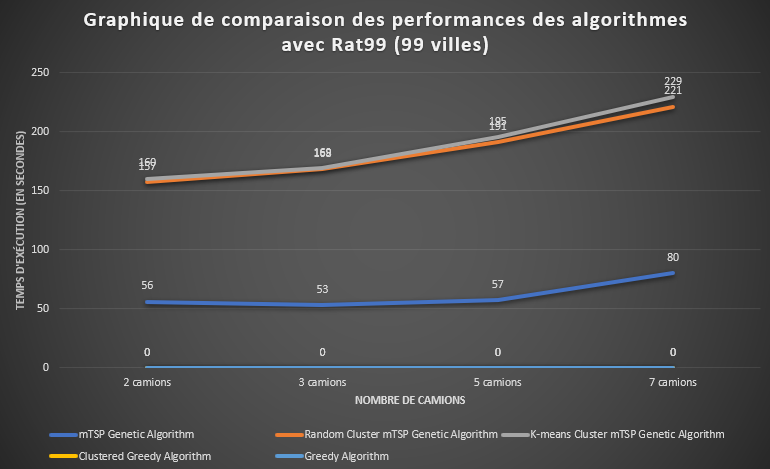
    <br>
        
    - Evolution du nombre de villes de 2 000 à 8 000 (avec 10 camions)  : <br>
    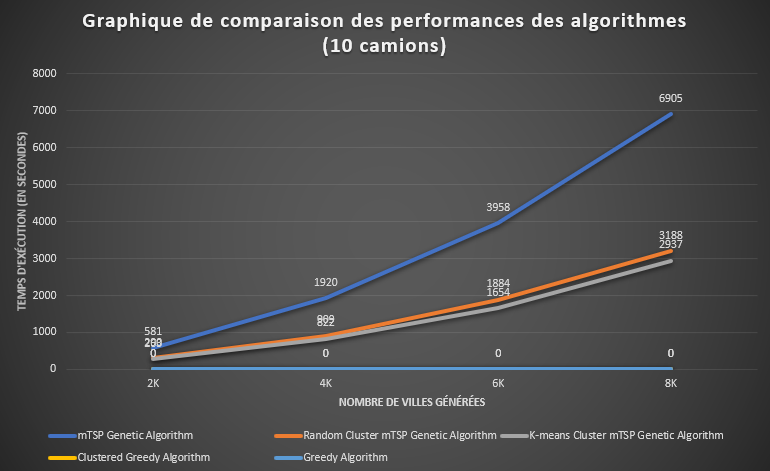
    <br>
<br>

- <b>Graphiques de comparaison des résultats de nos algorithmes :</b>

    - Evolution du nombre de camions sur l'instance du rat99 : 
        - Distances totales : <br>
            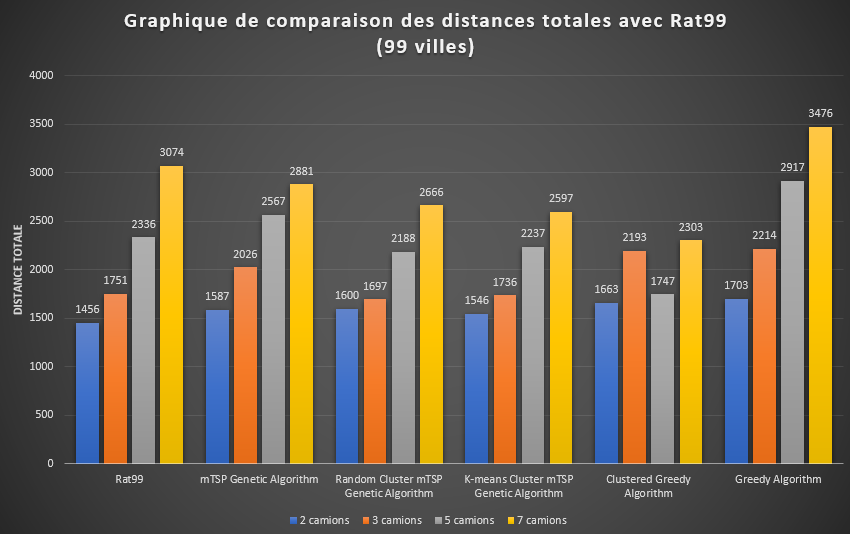
            <br>
        - Distances maximales : <br>
            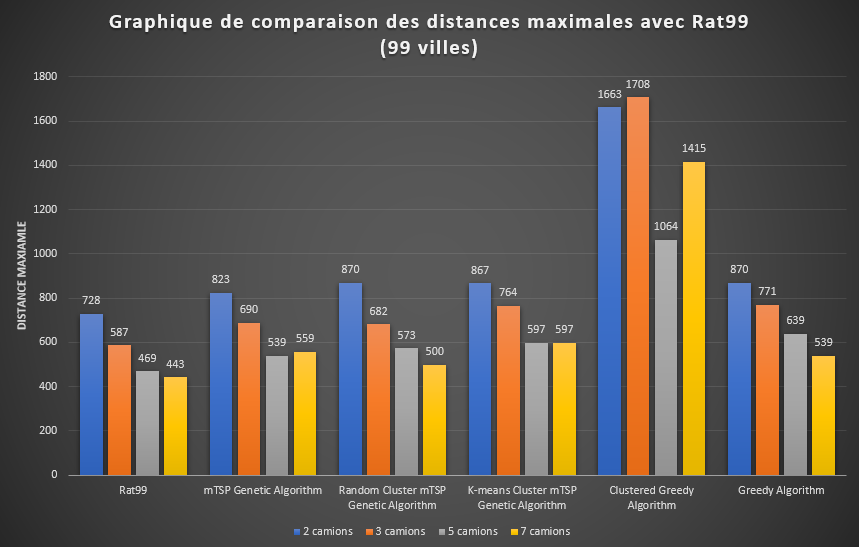
            <br>
        
    <br>
        
    - Evolution du nombre de villes de 2 000 à 8 000 (avec 10 camions)  : 
        - Distances totales : <br>
            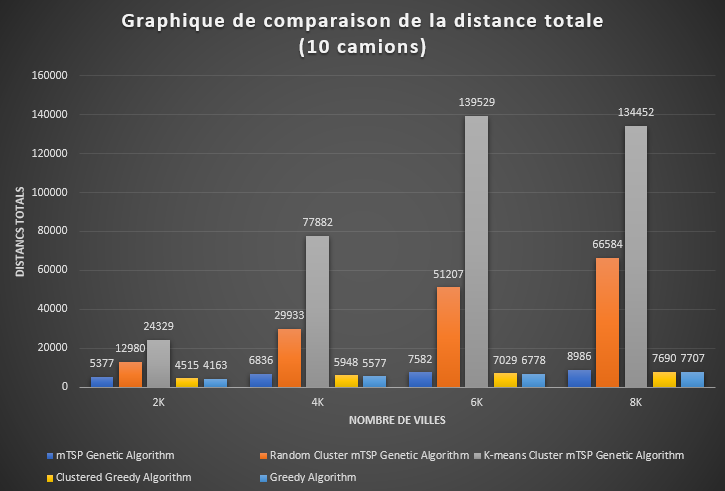
            <br>
        - Distance maximales : <br>
            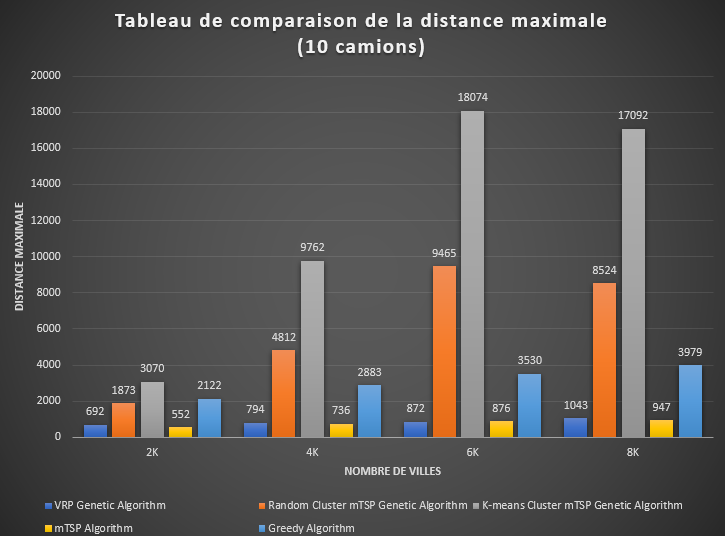
            <br>
<br>

- <b>Tableau comparatif points forts / faibles de chaque algorithmes :</b><br><br>
    Grâce à l'étude des tableaux ci-dessus, graphiques ci-dessus et de la qualité solutions renvoyées par les différentes méthodes évoquées ci-dessus on peut établir le tabbleau suivant :<br><br>
    |               |---| mTSP Genetic Algorithm |---|Random Cluster mTSP Genetic Algorithm |---|K-means Cluster mTSP Genetic Algorithm |---|Clustered Greedy Algorithm |---|Greddy Algorithm |
    |---------------|---|------------------------|---|--------------------------------------|---|---------------------------------------|---|---------------------------|---|-----------------|
    | Qualités      |---| - Adapté à une flotte de véhicules croissante <br>- Adapté aux grandes et petites instances <br>- Retourne des solutions de bonne qualité                |---| - Adapté à une flotte de véhicules croissante <br>- Adapté aux petites instances <br>- Retourne des solutions de très bonne qualité pour les petites instances                                |---| - Adapté à une flotte de véhicules croissante <br>- Adapté aux petites instances <br>- Retourne des solutions de très bonne qualité pour les petites instances                                 |---| - Utilisable en temps réel (presque instantané) <br>- Adapté à une flotte de véhicules croissante <br>- Fournit les meilleurs résultats pour l'optimisation de la distance totale et de la distance parcourue par le dernier camion si l'entrepôt est au centre des villes pour les grandes instances. <br>- Adapté aux instances de toutes tailles                    |---| - Utilisable en temps réel (presque instantané) <br>- Adapté à une flotte de véhicules croissante <br>- Fournis généralement les meilleurs résultats sauf pour l'optimisation de la distance du dernier camion dans les grandes instances.           |
    | Défauts       |---| - Non-utilisable en temps réel<br> > 2 heures pour une instance de plus de 10 000 villes                |---| - Non utilisable en temps réel<br> > plus d'une heure pour une instance de plus de 10 000 villes<br><br> - Très gourmand en ressources informatiques                                 |---| - Non utilisable en temps réel<br> > plus d'une heure pour une instance de plus de 10 000  villes<br><br> - Non efficace pour les grandes instances                                |---| - Moins efficace pour l'optimisation de la distance du dernier camion dans les petites instances. <br><br> - Solutions qui baissent rapidement en qualité dès que le dépot n'est plus au milieu                  |---| - Peut ne pas fournir des solutions optimales dans tous les scénarios, en particulier pour les problèmes complexes ou de grande envergure.           |
    
<br><br>


##### <u><b>Axes d'amélioration de nos méthodes :</b></u>
Suite à ces observations nous avons réfléchi à des améliorations à apporter à nos différentes méthodes :

- <u>Random Cluster mTSP Genetic Algorithm :</u><br>
    Le principal problème de cette méthode, c'est la répartition des paquets (clusters) au sein du plan.

    Une solution potentielle à ce problème serait d'instaurer une probabilité pour le cluster $n$ d'apparaître à un certain endroit dans le plan par rapport au dernier cluster créé $n-1$. Le cluster $n$ aura plus de chances d'apparaître s'il est éloigné du cluster $n-1$.
    
    Schéma exemple : <br>
    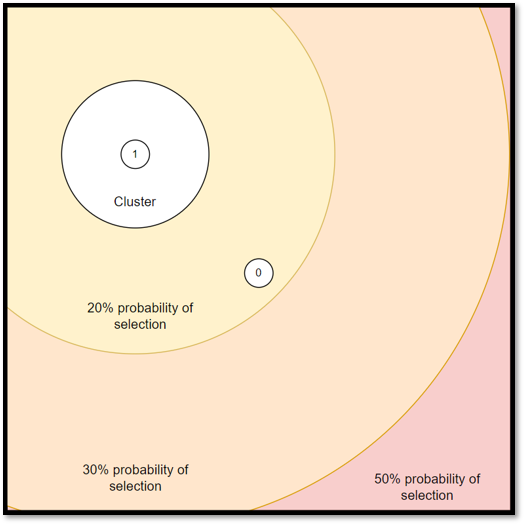
    
    <br>
    
- <u>Clustered Greedy Algorithm :</u><br>
    Pour cette méthode le problème provient de la fonction de division du plan, cette fonction ne permet pas de diviser le plan en $n$ zones de tailles égales dès que l'entrepôt n'est plus au centre du plan.
    Une potentielle solution est donc de modifier pour que le plan soit divisé en $n$ zones égales sans que la position du dépot ait la moindre importance.
    
    Exemple avec 5 camions : 
    |<center>Actuellement</center> |                  | <center>Division souhaitée</center>|
    |--------------|------------------|--------------------|
    |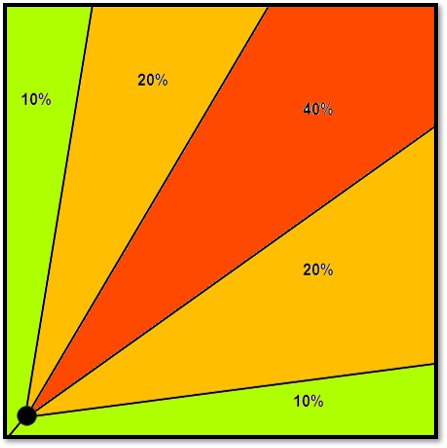| ----> |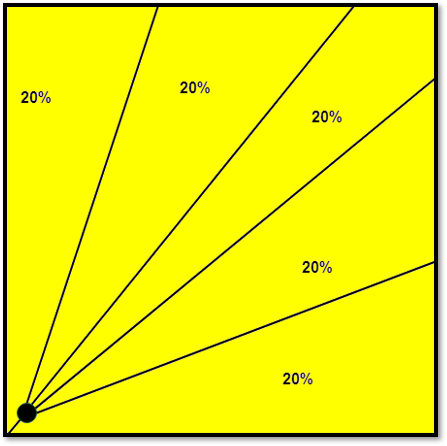|
    
    <br>
    
- <u>Greedy Algorithm :</u><br>
    Pour cette méthode le problème provient de la selection du point le plus proche, un tel système n'anticipe pas le choix des prochaines villes, prenons l'exemple suivant : <br>
    |              |
    |--------------|
    |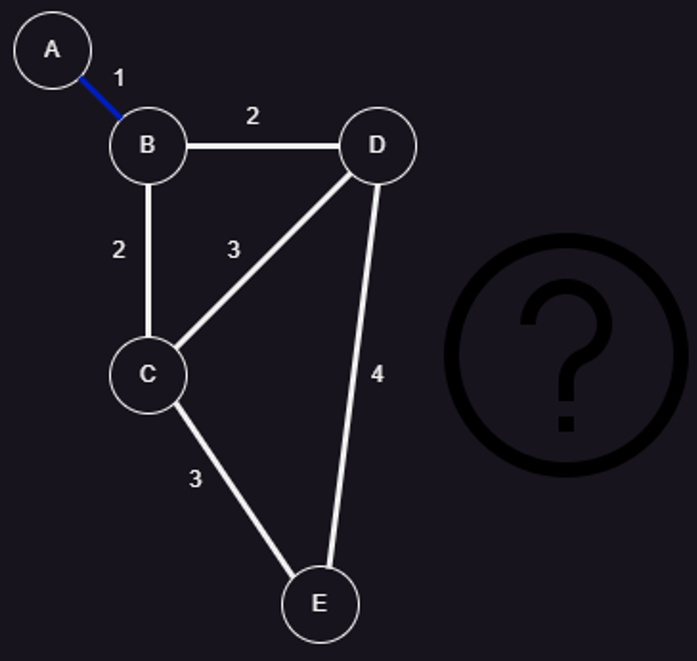|
    
    <br><br>
    
    Sur cet exemple il y a des chances que l'algorithme choisisse le chemin suivant $[A,B,C,D,E] = 10$, si l'algorithme anticipait un nombre $x$ de prochains choix l'algorithme choissirait plutôt un chemin tel que $[A,B,D,C,E] = 9$<br>
    
    Schémas :
    |              |                  |                    |
    |--------------|------------------|--------------------|
    |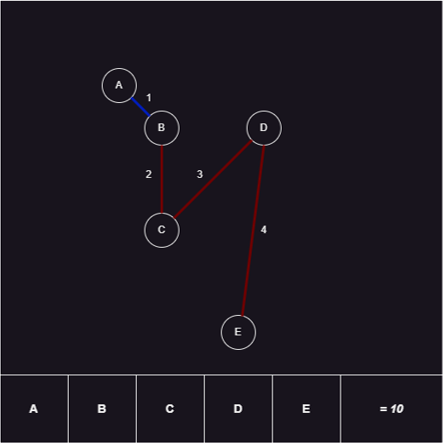| ----> |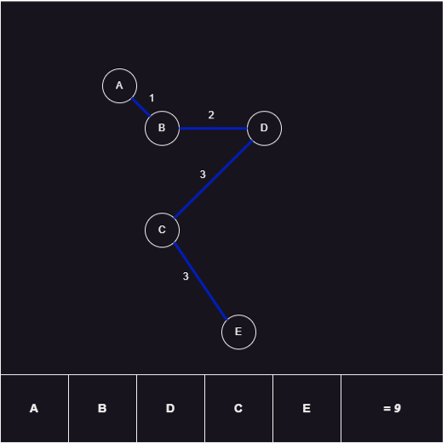|
    
    <br>


### <u><b>Conclusion :</b></u>
Dans le cadre de ce projet, nous avons exploré plusieurs approches pour résoudre un problème NP-complet : le problème du multi-voyageur de commerce (mTSP). Pour rappel, ce problème consiste à minimiser la distance totale parcourue par une flotte de camions devant visiter une série de villes à partir d'un dépôt commun. Dans notre cas, nous cherchions à réduire la distance parcourue par le dernier camion rentrant au dépôt.

Parmi les méthodes d'optimisation évaluées, on retrouve des méthodes directes comme les algorithmes génétiques ou les algorithmes gloutons. Nous avons aussi identifié une méthode séparant le problème en deux sous-parties : la création de sous-ensembles puis l'optimisation de chaque sous-ensemble. Toutes ces méthodes ont été appliquées à des instances de différentes tailles et configurations.

L'analyse comparative de ces méthodes a permis de mettre en évidence leurs forces et leurs faiblesses respectives. En particulier, elle a montré que les algorithmes génétiques, bien que plus complexes, peuvent offrir des performances supérieures, surtout lorsque le nombre de villes est élevé. De plus, le clustering semble améliorer la performance des deux types d'algorithmes, génétiques et gloutons, en réduisant l'espace de recherche et en permettant de traiter séparément des sous-ensembles de villes.

De plus, cette étude a permis d'identifier des pistes d'amélioration pour chacune des méthodes examinées. Ces améliorations concernent principalement la manière dont le clustering est réalisé, ainsi que la sélection du prochain point à visiter dans l'algorithme glouton.

En somme, ce projet nous a permis d'acquérir une compréhension approfondie du problème du mTSP et des différentes stratégies pour le résoudre. Bien que ce problème soit NP-complet et donc intrinsèquement difficile, les résultats obtenus montrent qu'il est possible, grâce aux bonnes techniques, d'obtenir des solutions efficaces qui peuvent être utiles dans des situations réelles, par exemple pour optimiser les itinéraires de livraison dans le cadre de la logistique de transport.

En conclusion, le travail effectué au cours de ce projet nous a permis d'explorer en profondeur le problème mTSP, de mettre en pratique des techniques d'optimisation avancées et de proposer des améliorations concrètes. Ce projet offre une base solide pour des travaux futurs, comme l'exploration d'autres techniques d'optimisation, l'intégration de contraintes supplémentaires dans le problème, ou l'application des méthodes développées à d'autres types de problèmes de routage.

### <u><b>Annexes :</b></u><a name="annexes"></a>
##### <u><b>Démonstation de la NP-complétude du TSP :</b></u><a name="npcomplet"></a>
On va chercher à prouver que le TSP est dans NP

Le TSP est dans la classe de complexité NP car, étant donné une suite de sommets, on peut vérifier en un temps linéaire :
- si cette suite de sommets constitue bien un circuit : il faut vérifier qu’elle parcourt bien les sommets de proche en proche (chaque sommet est le voisin du précédent). Cette vérification se fait en temps linéaire $O(n)$.
- si elle passe au moins une fois par chaque sommet. Cette vérification se fait en temps linéaire $O(n)$.
- si son coût est inférieur à $k$ : il faut faire la somme des valeurs des arêtes parcourues par le circuit, et vérifier si cette somme est inférieure à $k$. Cette vérification se fait en temps linéaire $O(n)$.


On sait qu'un algorithme pour résoudre un cycle Hamiltonien est NP-complet, pour prouver que le TSP est NP-complet on va chercher à transformer une instance de cycle Hamiltonien en instance du TSP de manière à ce que les deux instances admettent la même réponse. On pose :<br>
- $I_{ch}$ l'instance du problème cycle hamiltonien, constitué du graphe $G=(V,E)$
    Graphe G : <br>
    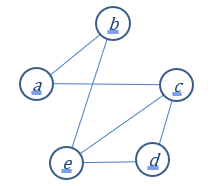
    <br>
- $I_{vdc}$ l'instance du TSP définie par : 
    - le graphe arête-valué $G'=(V, E(G) ∪ E(G̅))$, $v : E(G) ∪ E(G̅) ↦ ℕ)$ avec $v(u)=1 ∀ u ∈ E(G)$ et $v(u)=2 ∀ u ∈ E(G̅)$ où $G̅$ : complémentaire de $G$ <br>
        Graphe : <br>
        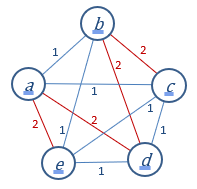
        <br>
    - l'entier $k=|V|$
    
Cette nouvelle instance se construit en temps polynomial car rechercher toutes les combinaisons de sommets non présente dans $G$ se fait en $O(|V|^2)$

Supposons qu’il existe un algorithme résolvant Voyageur de Commerce en temps polynomial. En appliquant cet algorithme sur $I_{vdc}$ :
- Soit on obtient la réponse oui. Dans ce cas, on sait qu’il existe un cycle hamiltonien dans $G$. En effet, la solution de $I_{vdc}$ est un circuit de longueur $|U|-1$ par construction de $I_{vdc}$. Ce circuit ne peut passer que par des arêtes de $G$, puisque celles de $G̅$ ont un cout de 2, la longueur de cette solution serait supérieure à $|U|-1$. Par ailleurs, cette solution ne passe qu’une seule fois par chaque sommet, car sinon sa longueur serait supérieure à $|V|-1$. Ce circuit constitue donc un cycle hamiltonien dans $G$, la réponse à $I_{ch}$ est donc oui.
<br>
- Symétriquement, si la réponse est non, on en déduit qu’il n’existe pas de cycle hamiltonien dans $G$, car sinon il constituerait une solution à $I_{vdc}$ et la réponse serait oui.

Cycle hamiltonien $⩽$ Voyageur de commerce. 

Maintenant vu que le cycle Hamiltonien est NP-complet, le problème du voyageur de commerce (TSP) est NP-complet

Dans le cadre de ce projet, nous avons exploré plusieurs approches pour résoudre un problème NP-complet : le problème du multi-voyageur de commerce (mTSP). Pour rappel, ce problème consiste à minimiser la distance totale parcourue par une flotte de camions devant visiter une série de villes à partir d'un dépôt commun. Dans notre cas, nous cherchions à réduire la distance parcourue par le dernier camion rentrant au dépôt.

Parmi les méthodes d'optimisation évaluées, on retrouve des méthodes directes comme les algorithmes génétiques ou les algorithmes gloutons. Nous avons aussi identifié une méthode séparant le problème en deux sous-parties : la création de sous-ensembles puis l'optimisation de chaque sous-ensemble. Toutes ces méthodes ont été appliquées à des instances de différentes tailles et configurations.

L'analyse comparative de ces méthodes a permis de mettre en évidence leurs forces et leurs faiblesses respectives. En particulier, elle a montré que les algorithmes génétiques, bien que plus complexes, peuvent offrir des performances supérieures, surtout lorsque le nombre de villes est élevé. De plus, le clustering semble améliorer la performance des deux types d'algorithmes, génétiques et gloutons, en réduisant l'espace de recherche et en permettant de traiter séparément des sous-ensembles de villes.

De plus, cette étude a permis d'identifier des pistes d'amélioration pour chacune des méthodes examinées. Ces améliorations concernent principalement la manière dont le clustering est réalisé, ainsi que la sélection du prochain point à visiter dans l'algorithme glouton.

En somme, ce projet nous a permis d'acquérir une compréhension approfondie du problème du mTSP et des différentes stratégies pour le résoudre. Bien que ce problème soit NP-complet et donc intrinsèquement difficile, les résultats obtenus montrent qu'il est possible, grâce aux bonnes techniques, d'obtenir des solutions efficaces qui peuvent être utiles dans des situations réelles, par exemple pour optimiser les itinéraires de livraison dans le cadre de la logistique de transport.

En conclusion, le travail effectué au cours de ce projet nous a permis d'explorer en profondeur le problème mTSP, de mettre en pratique des techniques d'optimisation avancées et de proposer des améliorations concrètes. Ce projet offre une base solide pour des travaux futurs, comme l'exploration d'autres techniques d'optimisation, l'intégration de contraintes supplémentaires dans le problème, ou l'application des méthodes développées à d'autres types de problèmes de routage.